# Multilayer Perceptron Demo in Breast Cancer Dataset

## Breast Cancer Dataset

In [1]:
# Random Seed For Reproducible
import numpy as np
import random
random_seed = 0
np.random.seed(random_seed)
random.seed(random_seed)

# Load Dataset
from sklearn.datasets import load_breast_cancer, load_diabetes
cancer = load_breast_cancer()

This object is like a dictionary, it contains a description of the data and the features and targets:

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print("Full description: ") 
print(cancer['DESCR'])
cancer['data'].shape

Full description: 
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 

(569, 30)

In [4]:
print(cancer.target_names)

['malignant' 'benign']


In [5]:
# Put data to x and target to y
x = cancer['data']
y = cancer['target']

### Data Preview

In [6]:
import pandas as pd
def to_dataframe(x, y, columns):
    """
    Convert data to dataframe, just for preview
    """
    # add data features
    df = pd.DataFrame(x, columns=columns)
    # add Target
    df['target'] = y
    return df

In [7]:
# View Data
to_dataframe(x, y, cancer['feature_names'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Data Split
Split data into train and test data, to make sure our model not overfit with data train

In [8]:
from sklearn.model_selection import train_test_split
# Split Dataset to train and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Data Preprocessing
Use standar scale for processing the data <br>
`z = (x - u) / s` <br>
where `u` is the mean of the training samples and `s` is the standard deviation of the training samples

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
# View Data
to_dataframe(x_train, y_train, cancer['feature_names'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,0.094251,...,0.213533,-1.036045,-0.848808,0.342499,-0.730097,-0.812321,-0.757984,-0.016148,-0.385034,1
1,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,-0.425471,...,1.066842,-0.689922,-0.668697,-0.095537,-0.537866,-0.375048,-0.606870,0.096690,-0.386158,1
2,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,-0.575221,...,-0.977818,0.262137,0.113888,-0.524724,-0.520866,-0.182989,-0.023719,-0.200502,-0.751443,1
3,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,0.540567,...,-0.757927,-0.735737,-0.658966,-0.816748,-1.034921,-1.091633,-0.852545,-1.076186,-0.546883,1
4,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,-0.426939,...,1.058637,-0.422423,-0.440955,-0.303494,-0.467251,-0.724565,-0.783118,0.311240,-0.082129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1.330176,0.199096,1.197454,1.252698,-0.521129,-0.881910,-0.093733,0.252625,-0.947798,-1.865718,...,-0.203276,0.649345,0.605735,-0.361014,-0.888328,-0.233135,0.229158,-0.535836,-1.467962,0
451,-0.467933,1.176375,-0.323157,-0.497297,1.609573,2.702147,1.799057,0.952923,0.806090,2.901339,...,2.484648,-0.277294,-0.289867,2.337996,5.270909,4.199765,1.633011,2.323247,6.968987,0
452,-1.324229,-0.200482,-1.317546,-1.048765,0.325493,-0.867634,-0.776990,-0.898197,-1.108571,1.016245,...,-0.085125,-0.923429,-0.753887,0.037201,-0.960905,-0.767691,-0.979750,-0.715423,-0.119781,1
453,-1.243810,-0.224553,-1.280076,-1.022212,-1.952479,-1.583811,-1.125696,-1.262871,-0.571443,0.264556,...,-0.772695,-1.323643,-0.985726,-2.711807,-1.468356,-1.341360,-1.754014,-1.581571,-1.006018,1


## Training MLP Model

In [12]:
# Import Modules
import torch
import torchvision

# random seed for reusable training
random_seed = 1
torch.manual_seed(random_seed)
torch.backends.cudnn.enabled = False

### Dataset to dataloader

Sometimes one epoch is too big to feed to the computer at once we divide it in several smaller batches. <br>
`Epoch` = **One Epoch** is when an **ENTIRE dataset** is passed **forward** and **backward** through the neural network **only ONCE**. <br>
`Batch Size` = Total number of training examples present **in a single batch**.

In [13]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

def create_data_loader(x, y, batch_size):
    """
    Function to create data loader, split full data to minibatch
    ex(batch_size=2): [1,2,3,4,5,6,7,8] --> [[1,2], [3,4], [5,6], [7,8]]
    """
    # Convert numpy data to torch tensor
    x_tensor = torch.Tensor(x)
    y_tensor = torch.Tensor(y)
    
    # Create tensordataset
    dataset = TensorDataset(x_tensor, y_tensor)
    
    # Create Dataloader with batch_size
    data_loader = DataLoader(dataset, batch_size=batch_size)
    
    return data_loader

# Parameter batch_size
train_batch_size = 1000
test_batch_size = 1000

train_data_loader = create_data_loader(x=x_train, y=y_train, batch_size=train_batch_size)
test_data_loader = create_data_loader(x=x_test, y=y_test, batch_size=test_batch_size)

In [14]:
# get sample data
examples = enumerate(train_data_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [15]:
# Data Training Shape
example_data.shape

torch.Size([455, 30])

In [16]:
# Target Training Shape
example_targets.shape

torch.Size([455])

## Models

In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

![MLP](https://www.researchgate.net/profile/Nicolas_Yu/publication/316615322/figure/fig1/AS:512951140483072@1499308491041/MLP-with-one-hidden-layer-It-consists-of-three-layers-the-input-layer-the-hidden-layer.png "MLP")

In [18]:
class Net(nn.Module):
    """
    Single Hidden Layer Network
    """
    def __init__(self, input_shape, output_class, hidden_nodes):
        """
        Args:
            input_shape: Shape of data
            output_class: number of output class data
            hidden_nodes: number of hidden nodes in each layer 
        """
        
        # Init
        super(Net,self).__init__()
        self.input_shape = input_shape
        self.output_class = output_class
        self.hidden_nodes = hidden_nodes
        
        # linear layer (input_shape -> hidden_nodes)
        self.fc1 = nn.Linear(input_shape, hidden_nodes)
        
        # linear layer (hidden_nodes -> output_class)
        self.fc2 = nn.Linear(hidden_nodes, output_class)
        
        
    def forward(self,x):
        # flatten image input
        x = x.view(-1, self.input_shape)
        
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        
        # add output layer
        x = self.fc2(x)
        
        return x

### Init Network

In [19]:
network = Net(input_shape=30, output_class=1, hidden_nodes=10)

# Use cuda will accelerated by gpu
if torch.cuda.is_available():
    network.cuda()

### Set the Optimizer
- [Simple theory of Optimizers](https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3)
- [Torch optim doc](https://pytorch.org/docs/stable/optim.html)

In [20]:
learning_rate = 0.0001
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

### Criterion
- [A brief overview of loss function in pytorch](https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7)

In [21]:
criterion = nn.BCEWithLogitsLoss() #nn.CrossEntropyLoss() #  nn.MSELoss() # nn.SmoothL1Loss() # nn.NLLLoss()

### Training

In [22]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc


def one_epoch_train(network, optimizer, data_loader):
    """
    One Epoch Training Function
    """
    # init arrays
    acc_epoch = np.zeros(len(data_loader))
    loss_epoch = np.zeros(len(data_loader))
    
    # Set to Train mode on
    network.train() 
    # Start Training
    for batch_idx, (data, target) in enumerate(data_loader):
        
        # Convert data and target to cuda datatype
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        # Main Training Process
        optimizer.zero_grad() # Clear all Gradient in Optimizer
        output = network(data) # Forward Propagation
        loss = criterion(output.view(-1), target) # Calculcate loss between forward result and target
        loss.backward() # Backward Propagation
        optimizer.step() # Update Gradient in Optimizer
        
        # Put loss and accuracy to arrays
        loss_epoch[batch_idx] = loss.item()
        acc_epoch[batch_idx] = binary_acc(output.view(-1), target)
        
    return loss_epoch.mean(), acc_epoch.mean()

def one_epoch_test(network, optimizer, data_loader):
    """
    One Epoch Testing Function
    """
    # init arrays
    acc_epoch = np.zeros(len(data_loader))
    loss_epoch = np.zeros(len(data_loader))
    
    # Set to Train mode of
    network.eval()
    
    # Should deactivate all gradient proccess
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):

            # Convert data and target to cuda datatype
            if torch.cuda.is_available():
                data = data.cuda()
                target = target.cuda()

            # Main Training Process
            output = network(data) # Only Forward Propagation
            loss = criterion(output.view(-1), target) # Calculcate loss between forward result and target

            # Put loss and accuracy to arrays
            loss_epoch[batch_idx] = loss.item()
            acc_epoch[batch_idx] = binary_acc(output.view(-1), target)
        
    return loss_epoch.mean(), acc_epoch.mean()

In [23]:
n_epochs = 1000
log_interval = 50

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accs = np.zeros(n_epochs)
test_accs = np.zeros(n_epochs)

for epoch in range(n_epochs):
    train_loss, train_acc = one_epoch_train(network, optimizer, train_data_loader)
    test_loss, test_acc = one_epoch_test(network, optimizer, test_data_loader)
    
    train_losses[epoch] = train_loss
    test_losses[epoch] = test_loss
    train_accs[epoch] = train_acc
    test_accs[epoch] = test_acc
    if epoch % log_interval == 0:
        print('Train Epoch: {}/{} \t loss(train | test): {:.6f} | {:.6f} \t acc(train|test): {:.0f}% | {:.0f}%'.format(epoch, n_epochs, train_loss, test_loss, train_acc, test_acc))

Train Epoch: 0/1000 	 loss(train | test): 0.694867 | 0.684479 	 acc(train|test): 56% | 61%
Train Epoch: 50/1000 	 loss(train | test): 0.665304 | 0.654565 	 acc(train|test): 67% | 71%
Train Epoch: 100/1000 	 loss(train | test): 0.636032 | 0.626545 	 acc(train|test): 73% | 75%
Train Epoch: 150/1000 	 loss(train | test): 0.607098 | 0.599088 	 acc(train|test): 79% | 81%
Train Epoch: 200/1000 	 loss(train | test): 0.578603 | 0.571371 	 acc(train|test): 83% | 82%
Train Epoch: 250/1000 	 loss(train | test): 0.550830 | 0.543892 	 acc(train|test): 85% | 85%
Train Epoch: 300/1000 	 loss(train | test): 0.524218 | 0.517342 	 acc(train|test): 87% | 86%
Train Epoch: 350/1000 	 loss(train | test): 0.498601 | 0.492012 	 acc(train|test): 88% | 86%
Train Epoch: 400/1000 	 loss(train | test): 0.474037 | 0.467760 	 acc(train|test): 89% | 87%
Train Epoch: 450/1000 	 loss(train | test): 0.450722 | 0.444545 	 acc(train|test): 90% | 89%
Train Epoch: 500/1000 	 loss(train | test): 0.428311 | 0.422472 	 acc(tra

### Plot Results

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

def plot_(train, test, xlabel="epoch", ylabel="loss", title="Result Training", rolling=20):
    """
    Function for plot the result
    """
    df = pd.DataFrame()
    df['train'] = train
    df['test'] = test
    df = df.rolling(rolling).mean()
    sns.lineplot(hue="region", style="event",data=df)
    # other info
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

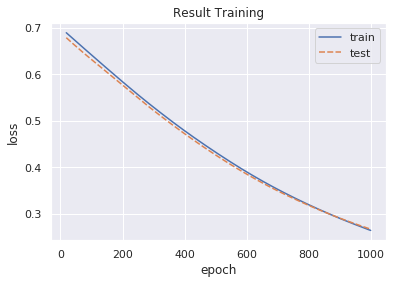

In [25]:
# Check Loss
plot_(train_losses, test_losses)

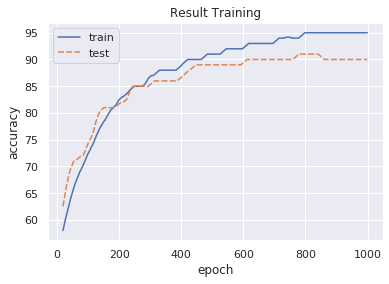

In [26]:
# Check accuracy
plot_(train_accs, test_accs, ylabel="accuracy")

## Challenge Home Work !
## Rules:
- Get accuracy more than **98%** (train and test)
- Not overfit with data train
- Only use "Multi-Layer Perceptron" models,  on your Network
- Can change:
   - loss function
   - learning rate
   - momentum
   - optimizer
   - network configuration (hidden layer, add nn.Linear, etc)
   - etc, except above restriction